<a href="https://colab.research.google.com/github/ButuhAqua/tugas-artificial-inteligence/blob/main/artificial_inteligence_rafi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
# Nama: Rafi Rahman Aripin
# NIM: 20220801102

# Import library yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [15]:
# Contoh dataset bahan makanan restoran Jepang
data = {
    'Bahan': ['Nori', 'Salmon', 'Tuna', 'Sake', 'Miso', 'Rice', 'Egg', 'Tofu', 'Soy Sauce', 'Wakame'],
    'Protein (g)': [5, 25, 24, 0, 2, 6, 13, 8, 8, 3],
    'Lemak (g)': [0.1, 14, 6, 0, 4, 0.2, 10, 5, 0.2, 0.5],
    'Karbohidrat (g)': [1.5, 0, 0, 0, 22, 45, 1.1, 2, 3, 5],
    'Kalori (kcal)': [35, 208, 132, 0, 35, 160, 143, 76, 40, 12],
    'Cocok untuk Sushi': [1, 1, 1, 0, 0, 1, 1, 0, 0, 0]  # 1 = Ya, 0 = Tidak
}

# Convert dictionary ke DataFrame
df = pd.DataFrame(data)

# Menampilkan dataset
df.head()

,Bahan,Protein (g),Lemak (g),Karbohidrat (g),Kalori (kcal),Cocok untuk Sushi
0,Nori,5,0.1,1.5,35,1
1,Salmon,25,14.0,0.0,208,1
2,Tuna,24,6.0,0.0,132,1
3,Sake,0,0.0,0.0,0,0
4,Miso,2,4.0,22.0,35,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Bahan              10 non-null     object 
 1   Protein (g)        10 non-null     int64  
 2   Lemak (g)          10 non-null     float64
 3   Karbohidrat (g)    10 non-null     float64
 4   Kalori (kcal)      10 non-null     int64  
 5   Cocok untuk Sushi  10 non-null     int64  
dtypes: float64(2), int64(3), object(1)
memory usage: 608.0+ bytes
Bahan                0
Protein (g)          0
Lemak (g)            0
Karbohidrat (g)      0
Kalori (kcal)        0
Cocok untuk Sushi    0
dtype: int64


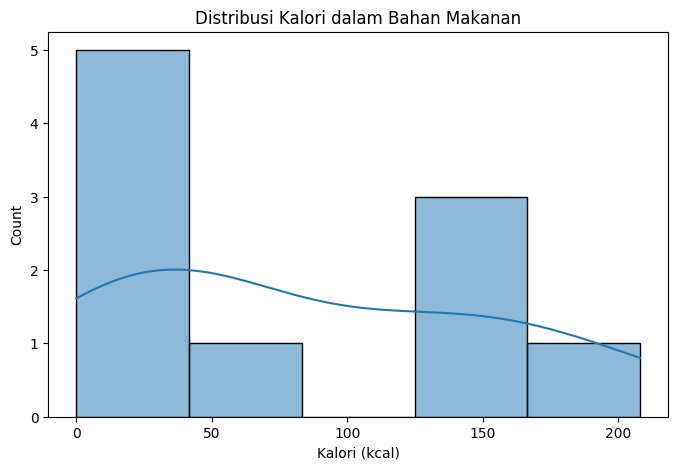

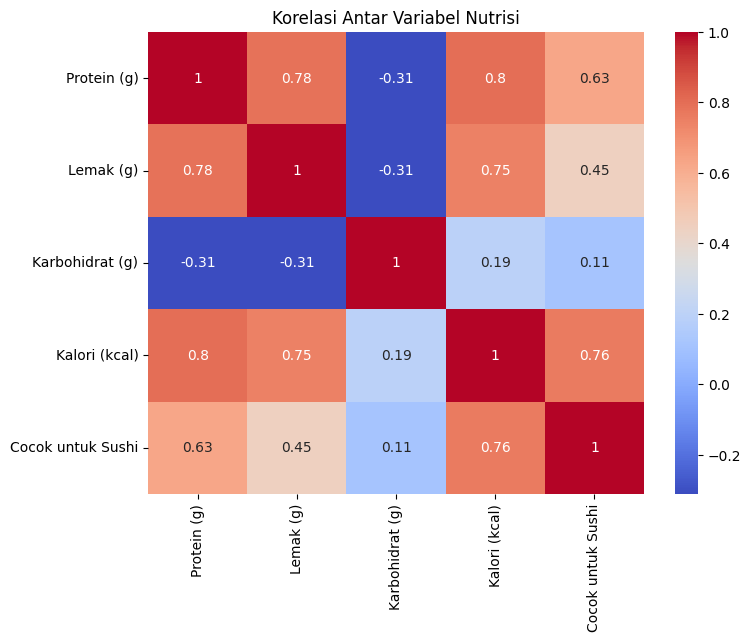

In [22]:
# Cek informasi dataset
df.info()

# Statistik deskriptif
df.describe()

# Cek apakah ada nilai NaN
print(df.isnull().sum())

# Visualisasi distribusi kalori (jika error pada histplot, gunakan distplot)
plt.figure(figsize=(8,5))
sns.histplot(df['Kalori (kcal)'], kde=True)
# Jika histplot tidak tersedia, gunakan distplot:
# sns.distplot(df['Kalori (kcal)'], kde=True)
plt.title('Distribusi Kalori dalam Bahan Makanan')
plt.show()

# Korelasi antar variabel (hanya variabel numerik)
plt.figure(figsize=(8,6))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title('Korelasi Antar Variabel Nutrisi')
plt.show()


In [20]:
# Pisahkan fitur dan label
X = df.drop(columns=['Bahan', 'Cocok untuk Sushi'])  # Fitur
y = df['Cocok untuk Sushi']  # Label

# Normalisasi fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Akurasi: 1.00


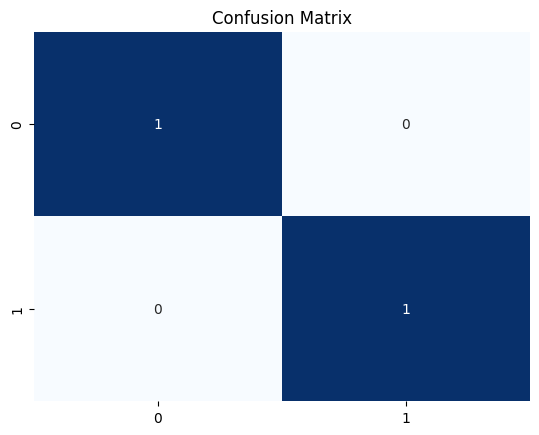

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00         1

    accuracy                           1.00         2
   macro avg       1.00      1.00      1.00         2
weighted avg       1.00      1.00      1.00         2



In [19]:
# Inisialisasi model Random Forest
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Latih model dengan data latih
model.fit(X_train, y_train)

# Prediksi pada data uji
y_pred = model.predict(X_test)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.show()

# Classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))